## 80 - Chi-Square Distribution

The statistic that measures the extent to which results depart from the null expectation of independence is the chi-square statistic. 

It is the difference between the observed and expected values, divided by the square root of the expected value, squared, then summed across all categories. This process standardizes the statistic so it can be compared to a reference distribution

A low chi-square value for a set of counts indicates that they closely follow the expected distribution. A high chi- square indicates that they differ markedly from what is expected. There are a variety of chi-square distributions associated with different degrees of freedom

In [74]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


    # Observed frequencies from rolling the die
    # Counts of outcomes for faces 1 to 6 (number of occurrences for each face):
observed = [8, 12, 15, 10, 9, 6]  


    # Expected frequencies if the die is fair (equal probability for each face)

total_rolls = sum(observed)


    # Each face should appear 1/6th of the times if fair
    # We here create a list of 6 times the value 10 (because total_rolls / the number of faces) = 10
    # which is how many times each face should appear, 1/6th of the times

expected = [total_rolls / 6] * 6  

    # Perform the Chi-Square test
    # And provides chi-square statistic and its P-value:

chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)


    # Print results

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

    # Interpretation
if p_value < 0.05:  # Common significance level
    print("The die is likely not fair.")
else:
    print("The die is likely fair.")

Chi-Square Statistic: 5.0
P-value: 0.4158801869955079
The die is likely fair.


Output Explanation:

    Chi-Square Statistic:
        Measures the difference between observed and expected frequencies.
        Larger values suggest more significant deviation from expectations.

    P-value:
        Represents the probability of observing this Chi-Square statistic under the null hypothesis (that the die is fair).
        A small pp-value (e.g., < 0.05) indicates the observed data significantly deviates from what is expected, suggesting the die may not be fair.

Since the pp-value is greater than 0.05, we fail to reject the null hypothesis, indicating that the die is likely fair.

## Interpretation

### 1. Key Factors for Interpretation

Degrees of Freedom (dfdf):
The degrees of freedom depend on the number of categories minus one:


        df=(number of categories)−1
        df=(number of categories)−1 For a die, there are 6 faces, so df = 6−1 = 5.

Significance Level (α):
        
        This is the threshold for deciding whether to reject the null hypothesis. 
        Common values are α=0.05α=0.05 or α=0.01α=0.01.


### 2. Interpreting the Chi-Square Statistic

   a) Using Critical Values

You can compare χ2=5 to the critical value for df=5df=5 from a Chi-Square table:

    At α=0.05, the critical value is approximately 11.07.
    At α=0.01, the critical value is approximately 15.09.

Interpretation:

    Since χ2=5 is less than both critical values, you fail to reject the null hypothesis at these significance levels.
    This means there is no significant evidence to suggest the die is unfair.



b) Using p-value

Alternatively, calculate the p-value for χ2=5 and df=5 . Using Python:

In [42]:

chi2_stat = 5
df = 5
p_value = 1 - stats.chi2.cdf(chi2_stat, df)
print("P-value:", p_value)

P-value: 0.415880186995508


    For χ2=5, df=5, the p-value is approximately 0.415.

Interpretation:

A p-value of 0.415 means there’s a 41.5% probability of observing a Chi-Square statistic as extreme as 5 if the null hypothesis (fair die) is true.
    
Since p-value> 0.05, you fail to reject the null hypothesis.

3. Conclusion

    χ2=5 is small relative to the critical value or the p-value is large.

    This indicates that the differences between the observed and expected frequencies are not statistically significant.

   The data does not provide strong evidence to conclude that the die is unfair.

### More on Critical Values

The critical value is determined by the degrees of freedom (dfdf) and the significance level (α).

#### Formula for Critical Value:

The critical value χ2 α,df is the value of the Chi-Square statistic such that the area under the Chi-Square curve to the right of it equals α. This value depends on:

    Degrees of Freedom (df): df=number of categories−1df=number of categories−1.
    Significance Level (α): Common choices are α=0.05α=0.05 (5%) or α=0.01α=0.01 (1%).


#### In Python: Using scipy.stats.chi2.ppf

You can calculate the critical value using the percent point function (inverse CDF) of the Chi-Square distribution.

In [69]:
# Parameters
alpha = 0.05  # Significance level
df = 5        # Degrees of freedom

# Critical value
critical_value = stats.chi2.ppf(1 - alpha, df)
print("Critical Value:", critical_value)

Critical Value: 11.070497693516351


#### How to Use the Critical Value

    Compare your Chi-Square statistic (χ2) to the critical value:
        If χ2>critical value, reject the null hypothesis.
        If χ2≤critical value, fail to reject the null hypothesis.
    Example:
        χ2=5, critical value=11.07.
        Since 5<11.07, fail to reject the null hypothesis.

### Graph to illustrate critical value and rejection zone:

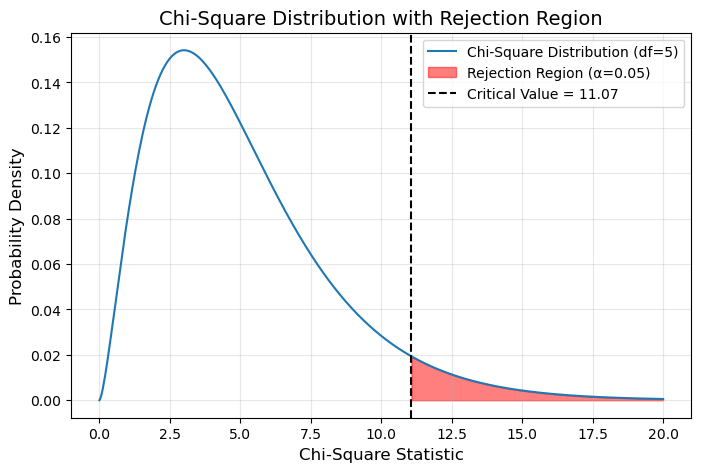

In [118]:
    # Parameters
df = 5  # degrees of freedom
alpha = 0.05  # significance level

    # Critical value

critical_value = chi2.ppf(1 - alpha, df)

    # Chi-Square distribution
    # Range for the x-axis
    # linspace = Return evenly spaced numbers over a specified interval. Param: start, stop, num of samples
     
x = np.linspace(0, 20, 500) 

    
    # scipy.stats.chi2 : A chi-squared continuous random variable.
    # Probability density function (PDF)
    # chi2.pdf(x, df, loc, scale)
    # this produces the y points that define the curve

y = chi2.pdf(x, df)  

    # Plotting the Chi-Square distribution
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Chi-Square Distribution (df=5)", color="C0")


    # Highlight rejection region

    # Calculating the x-coordinate points that form the rejection area

x_rejection = np.linspace(critical_value, 20, 500)

    # Finding the y-values for those points
y_rejection = chi2.pdf(x_rejection, df)

    # using the x and y rejection points (which define the chi-square df=5 curve) to highlight the graph, filling it:
    # Fill the area between two horizontal curves.
    # "y2= 0" is optional, but I added it for clarity, defines the y coordinates of the nodes defining the second curve.

plt.fill_between(x_rejection, y_rejection, y2= 0, color="red", alpha=0.5, label="Rejection Region (α=0.05)")

    
    # Add critical value line
    # axvline = Add a vertical line spanning the whole or fraction of the Axes.

plt.axvline(critical_value, color="black", linestyle="--", label=f"Critical Value = {critical_value:.2f}")
    
    # Labels and legend
plt.title("Chi-Square Distribution with Rejection Region", fontsize=14)
plt.xlabel("Chi-Square Statistic", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()